# Latin Square Task training data for neural network

## How were the training data generated?

Sudoku generators already exist (e.g., https://github.com/Kyubyong/sudoku/blob/master/generate_sudoku.py), so I adapted one of these into a much smaller matrix.

I then take a random cell that usually contains a blank space and call that the target. I check if this is a valid LST using custom code. I assign it a condition and ensure it can be solved.

Note that this will exclude problems where the simplest solution is multistep (working memory) but it won't exclude problems where the simplest solution is one step, but possible to solve with multistep. This is a bit different to the test set as those are never solveable with multiple steps.

## Ensuring minimal overlap with the training and testing data

I used the jaccard index to ensure there was not too much overlap between training and testing (and within the training set). This approach is a little bit flawed as two similar LSTs from a reasoning complexity point of view can don't always have a low jaccard index. An example of this would be where two problems are very similar but distractor cells are different.

The cutoff for the jaccard index is arbitrary so we generated two different datasets.
Let's plot some of the problems that are most correlated:

In [2]:
# get the datasets
import src.dataset as ds
train_dataset = ds.get_dataset(['../data/nn/generated_puzzle_data_binary_dist80.csv',
                                '../data/nn/generated_puzzle_data_ternary_dist80.csv',
                                '../data/nn/generated_puzzle_data_quaternary_dist80.csv'])
test_dataset = ds.get_dataset('../data/nn/puzzle_data_original.csv')

In [4]:
import numpy as np
from scipy.spatial.distance import jaccard
# see https://en.wikipedia.org/wiki/Jaccard_index

count = 0
j_min = np.zeros((len(train_dataset)))
for i in range(len(train_dataset)):
    puzzle_vec = train_dataset[i][0].reshape(-1).numpy()

    j_dist = np.zeros((len(test_dataset)))
    for trial in range(len(test_dataset)):
        test_vec = test_dataset[trial][0].reshape(-1).numpy()
        j_dist[trial] = jaccard(puzzle_vec, test_vec)
    
    j_min[i] = np.min(j_dist)

    # print a couple of similar puzzles
    if np.min(j_dist) < 0.82 and count < 2:
        most_similiar_trial = np.where(j_dist == np.min(j_dist))[0][0]
        print('Training puzzle=',i, 'Test puzzle=', most_similiar_trial)
        print('Training puzzle:')
        print(train_dataset.print_puzzle(i))
        print('Test Puzzle')
        print(test_dataset.print_puzzle(most_similiar_trial))
        count +=1

Training puzzle= 0 Test puzzle= 84
Training puzzle:
(tensor([[2, 0, 0, 0],
        [5, 0, 0, 2],
        [3, 4, 0, 0],
        [1, 0, 0, 0]]), tensor(4))
Test Puzzle
(tensor([[3, 0, 0, 0],
        [4, 0, 3, 0],
        [0, 4, 0, 5],
        [1, 0, 0, 4]]), tensor(3))
Training puzzle= 1 Test puzzle= 3
Training puzzle:
(tensor([[1, 0, 0, 0],
        [3, 5, 4, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]), tensor(2))
Test Puzzle
(tensor([[1, 0, 0, 0],
        [0, 0, 4, 0],
        [5, 4, 1, 2],
        [4, 0, 2, 0]]), tensor(3))


In [11]:
j_min = np.zeros((3000, 3))
for c, condition in enumerate(['binary', 'ternary', 'quaternary']):
    train_dataset = ds.get_dataset([f"../data/nn/generated_puzzle_data_{condition}_dist80.csv"])
    
    for i in range(len(train_dataset)):
        puzzle_vec = train_dataset[i][0].reshape(-1).numpy()

        j_dist = np.zeros((len(test_dataset)))
        for trial in range(len(test_dataset)):
            test_vec = test_dataset[trial][0].reshape(-1).numpy()
            j_dist[trial] = jaccard(puzzle_vec, test_vec)
        
        j_min[i, c] = np.min(j_dist)

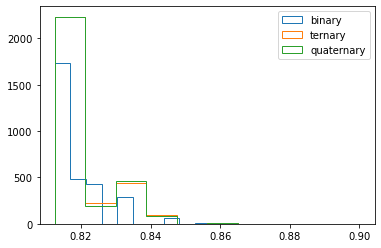

In [15]:
for c, condition in enumerate(['binary', 'ternary', 'quaternary']):
    plt.hist(j_min[:, c], label=condition, histtype='step')
plt.legend()
plt.show()

In [10]:
j_min[0:5,:]

array([[0.        , 0.        , 0.81818182],
       [0.        , 0.        , 0.83333333],
       [0.        , 0.        , 0.8125    ],
       [0.        , 0.        , 0.8125    ],
       [0.        , 0.        , 0.81818182]])